In [9]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys

d2020= pd.read_csv("DraftResultsData/2020draft.csv")

#Create list to store players names for cleaning up
split_player = d2020["Player"]
#Split out and store the name of the player
players=[i.split("\\")[0] for i in split_player]
#Split out and store first and last names
fname = [i.split(maxsplit = 1)[0] for i in players]
lname = [i.split(maxsplit = 1)[1] for i in players]
#Add first and last name columns
d2020["First Name"]=fname
d2020["Last Name"]=lname

#Create new df in the format desired
d2020c = d2020[["Rnd","Pick","Tm","First Name","Last Name","Pos","Age","College/Univ"]]

#Import data from 2019 draft
d2019= pd.read_csv("DraftResultsData/2019Draft_Rank.csv")
#Create df that only includes players drafted
drafted2019 = d2019.dropna()
drafted2019["Year"]="2019"

#Import data from 2018 draft
d2018= pd.read_csv("DraftResultsData/2018Draft_Rank.csv",encoding = 'ISO-8859-1')
#Create df that only includes players drafted
drafted2018 = d2018.dropna()
drafted2018["Year"]="2018"

#Import data from 2017 draft
d2017= pd.read_csv("DraftResultsData/2017Draft_Rank.csv",encoding = 'ISO-8859-1')
#Create df that only includes players drafted
drafted2017 = d2017.dropna()
drafted2017["Year"]="2017"

#Import data from 2016 draft
d2016= pd.read_csv("DraftResultsData/2016Draft_Rank.csv",encoding = 'ISO-8859-1')
#Create df that only includes players drafted
drafted2016 = d2016.dropna()
drafted2016["Year"]="2016"

#Import data from 2015 draft
d2015= pd.read_csv("DraftResultsData/2015Draft_Rank.csv",encoding = 'ISO-8859-1')
#Create df that only includes players drafted
drafted2015 = d2015.dropna()
drafted2015["Year"]="2015"
drafted2015.head()

frames = [drafted2015,drafted2016,drafted2017,drafted2018,drafted2019]
drafts15to19=pd.concat(frames)
drafts15to19

C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Pick Overall,Rank,Grade,First Name,Last Name,Position,Height,Weight,College,Team,Year
0,1.0,1.0,97.0,Jameis,Winston,QB,"6'3¾""",231.0,Florida State,Tampa Bay,2015
1,6.0,2.0,96.0,Leonard,Williams,DE,"6'4?""",302.0,USC,NY Jets,2015
2,4.0,3.0,94.0,Amari,Cooper,WR,"6'0?""",211.0,Alabama,Las Vegas,2015
3,3.0,4.0,93.0,Dante,Fowler Jr.,DE,"6'2?""",261.0,Florida,Jacksonville,2015
4,2.0,5.0,93.0,Marcus,Mariota,QB,"6'3¾""",222.0,Oregon,Tennessee,2015
...,...,...,...,...,...,...,...,...,...,...,...
334,236.0,335.0,35.0,John,Ursua,WR,"5'9⅛""",178.0,Hawai'i,Seattle,2019
335,199.0,336.0,34.0,Gerri,Green,OLB,"6'4""",252.0,Mississippi State,Indianapolis,2019
357,207.0,358.0,32.0,Ulysees,Gilbert III,ILB,"6'0⅛""",224.0,Akron,Pittsburgh,2019
365,221.0,366.0,31.0,Donnie,Lewis Jr.,CB,"6'0¼""",190.0,Tulane,Cleveland,2019


In [22]:
#Generate Scatter Plot, Regression Line, r, r^2 of Rank vs Pick Overall
def linregsingle(df,x_values,y_values,ex,ey):
    #run linear regression and store key values
    slope, intercept, r_value, p_value, std_err = st.linregress(df[x_values],df[y_values])

    #generate predicted y values based on regression model
    regress_values = df[x_values] * slope + intercept

    #store linear regression equation and correlation coefficient
    line_eq = "ŷ = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    corr_coef = "r = " + str(round(r_value,4))
    r_2 = "r^2 = " + str(round(r_value**2,4))

    #plot regression line
    plt.plot(df[x_values], regress_values, "r-")

    #plot regression equation and correlation coefficient on the graph
    plt.annotate(line_eq, (ex,(ey)),fontsize = 12, color = 'red')
    plt.annotate(corr_coef,(ex,(ey-15)),fontsize = 12, color = 'red')
    plt.annotate(r_2,(ex,(ey-30)),fontsize = 12, color = 'red')
    #plt.annotate("New York", (20000000,14000),fontsize =12, color = 'red')
    #plt.annotate("California", (35000000,2000),fontsize =12, color = 'red')
    #plt.annotate("New Jersey", (5000000,6000),fontsize =12, color = 'red')

    #Create scatter plot and add title, x-labels, and y-labels
    plt.scatter(df[x_values], df[y_values])
    ax = plt.gca()
    ax.invert_xaxis()
    plt.title(f"{x_values} vs {y_values}")
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    #plt.tight_layout()
    #plt.savefig(f"Graphics/{x_values}vs{y_values}.png")

In [29]:
#Generate Scatter Plot, Regression Line, r, r^2 of Rank vs Pick Overall
def linregcomp(df,x_values,y_values,r,c,ex,ey):
   
    class row:
        pass
    
    
    #run linear regression and store key values
    slope, intercept, r_value, p_value, std_err = st.linregress(df[x_values],df[y_values])

    #generate predicted y values based on regression model
    regress_values = df[x_values] * slope + intercept

    #store linear regression equation and correlation coefficient
    line_eq = "ŷ = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    corr_coef = "r = " + str(round(r_value,4))
    r_2 = "r^2 = " + str(round(r_value**2,4))

    #plot regression line
    axs[r,c].plot(df[x_values], regress_values, "r-")

    #plot regression equation and correlation coefficient on the graph
    #axs[r,c].annotate(line_eq, (ex,(ey)),fontsize = 12, color = 'red')
    #axs[r,c].annotate(corr_coef,(ex,(ey-15)),fontsize = 12, color = 'red')
    axs[r,c].annotate(r_2,(ex,(ey-30)),fontsize = 12, color = 'red')
    

    #Create scatter plot and add title, x-labels, and y-labels
    axs[r,c].scatter(df[x_values], df[y_values])
    #row.set_title(f"{x_values} vs {y_values}")
    #row.set_xlabel(x_values)
    #row.set_ylabel(y_values)
    #row.tight_layout()
    #plt.savefig(f"Graphics/{x_values}vs{y_values}.png")


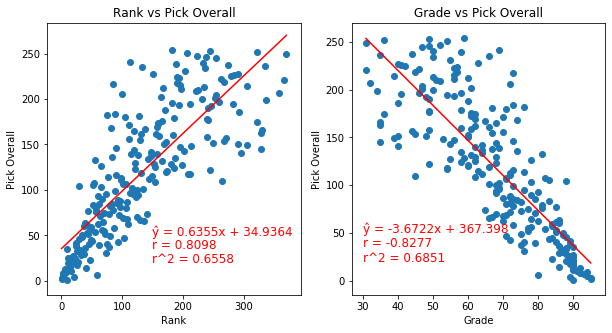

In [57]:

f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

linregcomp(drafted2019,"Rank","Pick Overall",ax1,150,50)
linregcomp(drafted2019,"Grade","Pick Overall",ax2,30,50)
#plt.savefig("Graphics/ComparingRankGrade")
plt.show()

Though it may be hard to tell at first glance these graphs tell the same story because the grade and rank are correlated.  I was curious which had a higher correlation with overall pick, so I ran a regression for both and found Grade to be a better predictor so I will observe grade moving forward.

In [31]:
x_values = drafted2019['Grade']
y_values = drafted2019['Pick Overall']
x_values = sm.add_constant(x_values)
# Note the difference in argument order
model = sm.OLS(y_values, x_values).fit()
predictions = model.predict(x_values) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Pick Overall   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     489.5
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.26e-58
Time:                        20:50:27   Log-Likelihood:                -1160.1
No. Observations:                 227   AIC:                             2324.
Df Residuals:                     225   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        367.3980     11.547     31.817      0.000     344.644     390.152
Grade         -3.6722      0.166    -22.124      0.000      -3.999      -3.345
==============================================================================
Omnibus:                       13.321   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.931
Skew:                           0.574   Prob(JB):                     0.000944
Kurtosis:                       3.394   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#List of position groups
positions = drafted2019["Position"].unique()
#Create indiv df's by position group
posdfs ={i:drafted2019[drafted2019["Position"]==i] for i in positions}

In [13]:
drafts15to19
posdfs15to19 = {i:drafts15to19[drafts15to19["Position"]==i] for i in positions}

In [47]:
posdfs["WR"]

,Pick Overall,Rank,Grade,First Name,Last Name,Position,Height,Weight,College,Team
10,25.0,11,90,Marquise,Brown,WR,"5'9⅜""",166,Oklahoma,Baltimore
32,32.0,33,87,N'Keal,Harry,WR,"6'2⅜""",228,Arizona State,New England
38,36.0,39,86,Deebo,Samuel,WR,"5'11¼""",214,South Carolina,San Francisco
39,64.0,40,86,DK,Metcalf,WR,"6'3⅜""",228,Ole Miss,Seattle
44,51.0,45,85,A.J.,Brown,WR,"6'0½""",226,Ole Miss,Tennessee
47,57.0,48,84,JJ,Arcega-Whiteside,WR,"6'2""",225,Stanford,Philadelphia
48,59.0,49,84,Parris,Campbell,WR,"5'11⅞""",205,Ohio State,Indianapolis
56,76.0,57,81,Terry,McLaurin,WR,"6'0⅛""",208,Ohio State,Washington
60,93.0,61,80,Miles,Boykin,WR,"6'3¾""",220,Notre Dame,Baltimore
64,126.0,65,78,Riley,Ridley,WR,"6'1¼""",199,Georgia,Chicago


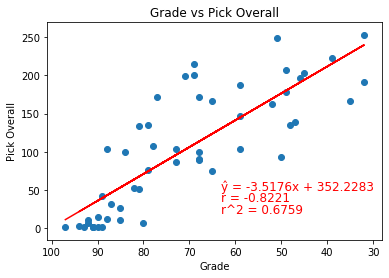

In [25]:
linregsingle(posdfs15to19["QB"],"Grade","Pick Overall",63,50)

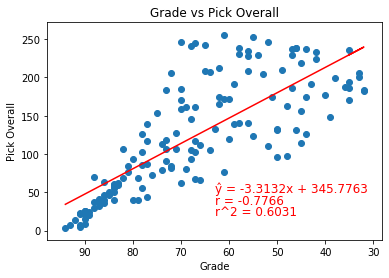

In [26]:
linregsingle(posdfs15to19["WR"],"Grade","Pick Overall",63,50)

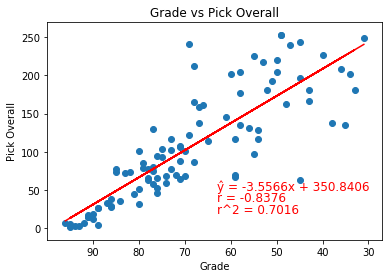

In [27]:
linregsingle(posdfs15to19["DE"],"Grade","Pick Overall",63,50)

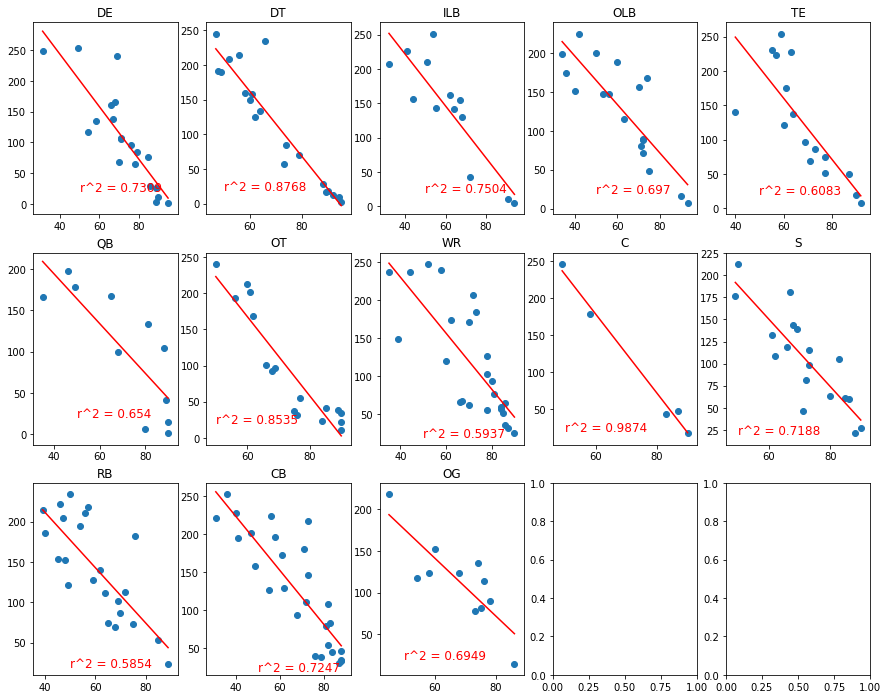

In [51]:


f,(axs) = plt.subplots(3,5,figsize = (15,12))
#(ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)=axs

# linregcomp(posdfs["DE"],"Grade","Pick Overall",0,0,30,50)
# ax1.set_title("DE")
r=0
c=0
across = [0,1,2,3,5,6,7,8]
for i in range(13):

        if (i+1)%5 == 0:
            
            
            linregcomp(posdfs[positions[i]],"Grade","Pick Overall",r,c,50,50)
            axs[r,c].set_title(positions[i])
            r=r+1
            c=0
            
            
           
        else:
            linregcomp(posdfs[positions[i]],"Grade","Pick Overall",r,c,50,50)
            axs[r,c].set_title(positions[i])
            c=c+1
           
    

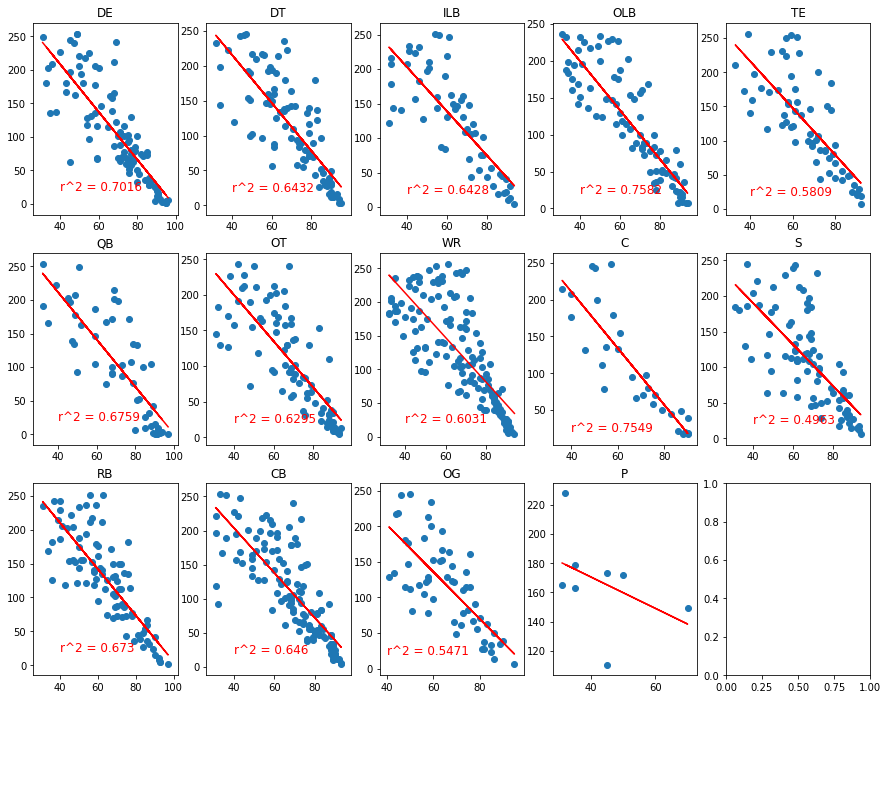

In [54]:
f,(axs) = plt.subplots(3,5,figsize = (15,12))
#(ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)=axs

# linregcomp(posdfs["DE"],"Grade","Pick Overall",0,0,30,50)
# ax1.set_title("DE")
r=0
c=0
across = [0,1,2,3,5,6,7,8]
for i in range(14):

        if (i+1)%5 == 0:
            
            
            linregcomp(posdfs15to19[positions[i]],"Grade","Pick Overall",r,c,40,50)
            axs[r,c].set_title(positions[i])
            r=r+1
            c=0
            
            
           
        else:
            linregcomp(posdfs15to19[positions[i]],"Grade","Pick Overall",r,c,40,50)
            axs[r,c].set_title(positions[i])
            c=c+1

In [49]:
for i in range(len(positions)):
    print(positions[i])

DE
DT
ILB
OLB
TE
QB
OT
WR
C
S
RB
CB
OG
P
K


In [40]:
r=0
c=0
for i in range(len(positions)):
    print(f"figure is {(i+1)} and remainder  is {(i+1)%5} and position is ({r},{c})")
    
    if (i+1)%5 == 0:
            r=r+1
            c=0
    else:
            c=c+1
           

figure is 1 and remainder  is 1 and position is (0,0)
figure is 2 and remainder  is 2 and position is (0,1)
figure is 3 and remainder  is 3 and position is (0,2)
figure is 4 and remainder  is 4 and position is (0,3)
figure is 5 and remainder  is 0 and position is (0,4)
figure is 6 and remainder  is 1 and position is (1,0)
figure is 7 and remainder  is 2 and position is (1,1)
figure is 8 and remainder  is 3 and position is (1,2)
figure is 9 and remainder  is 4 and position is (1,3)
figure is 10 and remainder  is 0 and position is (1,4)
figure is 11 and remainder  is 1 and position is (2,0)
figure is 12 and remainder  is 2 and position is (2,1)
figure is 13 and remainder  is 3 and position is (2,2)
figure is 14 and remainder  is 4 and position is (2,3)
figure is 15 and remainder  is 0 and position is (2,4)
